# Dimensionality Reduction

In this notebook we try a different approach from naive feature selection and instead we try dimensionality reduction techniques to improve the models discrimanitive capabilities. Specifically we compare LDA and PCA, two state-of-art dimensionality reduction techniques.

- PCA is an unsupervised method. It finds the directions of maximum variance in high-dimensional data and projects it onto a smaller dimensional subspace while retaining most of the information.
- LDA is a supervised method. It tries to find a projection that maximally separates the classes in a lower-dimensional space (maximizes class separability).
- aquí podríamos meter una gráfica mostrando cómo empeoran los resultados de los modelos cuanto más aumentamos la dimensionalidad (curse of dimensionality)?

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import plotly.express as px

In [13]:
# load data
transformed_df = pd.read_csv("transformed_df.csv")
transformed_df.drop(columns="Unnamed",inplace=True)

In [14]:
X = transformed_df.drop(columns="y")
y = transformed_df["y"]

Initially we use only 2 components just to visualize the results.

In [ ]:
# PCA: Unsupervised dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# LDA: Supervised dimensionality reduction
lda = LDA(n_components=1) 
X_lda = lda.fit_transform(X, y)

In [22]:
y.shape

(11500,)

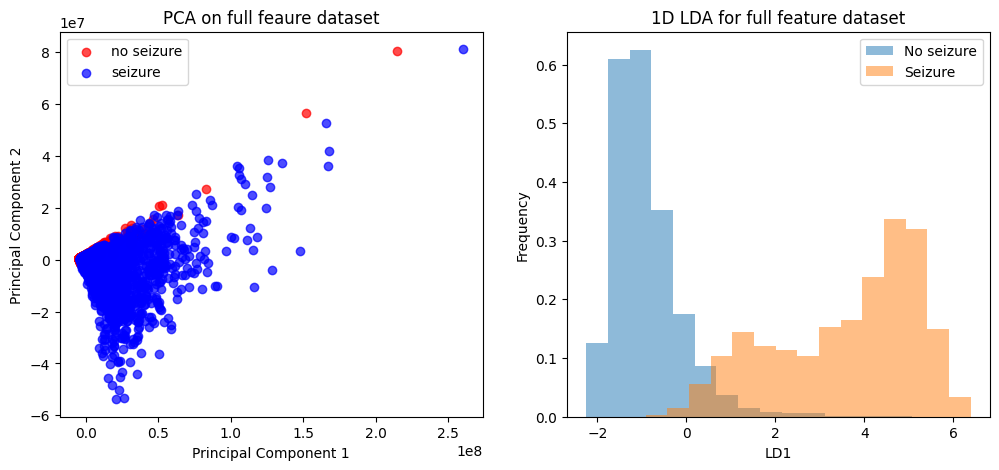

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ["red", "blue"]
for color, label, name in zip(colors, [0, 1], ["no seizure","seizure"]):
    plt.scatter(
        X_pca[y == label, 0],
        X_pca[y == label, 1],
        alpha=0.7,
        color=color,
        label=name
    )
plt.title("PCA on full feaure dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()



plt.subplot(1, 2, 2)
plt.hist(X_lda[y==0], bins=15, alpha=0.5, label='No seizure', density=True)
plt.hist(X_lda[y==1], bins=15, alpha=0.5, label='Seizure', density=True)
plt.title("1D LDA for full feature dataset")
plt.xlabel("LD1")
plt.ylabel("Probablity Density")
plt.legend()
plt.show()

Con una sola componente LDA se separan razonablemente bien. Para PCA seguramente hay que meter más componentes.

Checking explainable variance for each number of PCA of components.

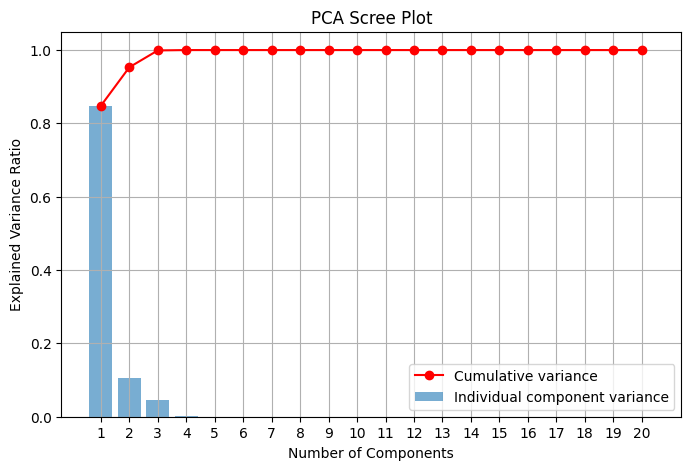

In [26]:
pca = PCA()
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))

# Plot individual explained variance ratios
plt.bar(range(1, len(explained_variance_ratio) + 1),
        explained_variance_ratio,
        alpha=0.6,
        label='Individual component variance')

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1),
         cumulative_explained_variance,
         marker='o',
         color='red',
         label='Cumulative variance')

plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Scree Plot')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid(True)
plt.show()


With the first 2 or 3 components we can explain almost 100% of the variance. Thus, it seems reasonable to pick only this first components to classify.

In [27]:
explained_variance_ratio

array([8.47915362e-01, 1.05128820e-01, 4.59646242e-02, 9.85537230e-04,
       2.23774029e-06, 1.78761260e-06, 7.80032676e-07, 3.83333421e-07,
       2.82032031e-07, 1.85249996e-07, 2.85618136e-10, 1.19142857e-10,
       8.09263040e-11, 5.05824729e-12, 2.62554873e-12, 3.92825170e-13,
       1.56491629e-13, 4.94746927e-15, 8.31841046e-16, 4.76346495e-17])

In [30]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 2. Create a DataFrame to make labeling easier
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df['label'] = y

# Map numeric labels to descriptive names
label_map = {0: 'no seizure', 1: 'seizure'}
df['label_name'] = df['label'].map(label_map)

# 3. Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(
    df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='label_name',         # color points by label name
    symbol='label_name',        # optionally vary marker symbol by label
    labels={'color': 'Condition'},  # legend axis label
    title='3D PCA Interactive Plot'
)

# 4. Customize the plot layout (optional)
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    legend_title_text='Label'
)

# 5. Show the plot
fig.show()
